## Introduction

At many points in your career, you'll need to be able to build complete, end-to-end data science projects on your own. Data science projects usually consist of one of two things:

- An exploration and analysis of a set of data. One example might involve analyzing donors to political campaigns, creating a plot, and then sharing an analysis of the plot with others.- 
An operational system that generates predictions based on data that updates continually. An algorithm that pulls in daily stock ticker data and predicts which stock prices rise and fall would be one example.

You'll find the ability to create data science projects useful in several different contexts:



- Projects help you build a portfolio, which is critical to finding a job as a data analyst or scientist.
- Working on projects helps you learn new skills and reinforce existing concepts.
- Most "real-world" data science and analysis work consists of developing internal projects.
  
- Projects allow you to investigate interesting phenomena and satisfy your curiosity.

Whether you aim to become a data scientist or analyst or you're just curious about the world, building projects can be immensely rewarding.

In this lesson, we'll walk through the first part of a complete data science project, including how to acquire the raw data. The project focuses on exploring and analyzing a dataset. We'll develop our data cleaning and storytelling skills, which enables us to build complete projects on our own.

We'll focus primarily on data exploration in this lesson. We'll also combine several messy data sets into a single clean one to make analysis easier. Over the next few lessons, we'll work through the rest of our project and perform the actual analysis.

The first step in creating a project is to decide on a topic. You want the topic to be something you're interested in and motivated to explore. It's very obvious when people are making projects just to make them, rather than out of a genuine interest in the topic.

Here are two ways to find a good topic:

- Think about what sectors or angles you're really interested in, then find data sets relating to those sectors.
- Review several datasets and find one that seems interesting enough to explore.

Whichever approach you take, you can start your search at these sites:

- [Data.gov](https://www.data.gov/) - A directory of government data downloads
- [/r/datasets](https://reddit.com/r/datasets) - A subreddit that has hundreds of interesting datasets
- [Awesome datasets](https://github.com/caesar0301/awesome-public-datasets) - A list of datasets hosted on GitHub
- [rs.io](http://rs.io/100-interesting-data-sets-for-statistics/) - A great blog post with hundreds of interesting datasets

In real-world data science, you may not find an ideal dataset. You might have to aggregate disparate data sources instead or do a good amount of data cleaning.

or the purposes of this project, we'll be using data about New York City public schools, which can be found [here](https://data.cityofnewyork.us/browse?category=Education).

## Finding All of the Relevant Datasets

Once you've chosen a topic, you'll want to pick an angle to investigate. It's important to choose an angle that has enough depth to analyze but isn't so complicated that it's difficult to get started. You want to finish the project and your results to be interesting to others.

One of the most controversial issues in the U.S. educational system is the efficacy of standardized tests and whether they're unfair to certain groups. Given our prior knowledge of this topic, investigating the correlations between [SAT scores](https://en.wikipedia.org/wiki/SAT) and demographics might be an interesting angle to take. We could correlate SAT scores with factors like race, gender, income, and more.

The SAT, or Scholastic Aptitude Test, is an exam that U.S. high school students take before applying to college. Colleges take the test scores into account when deciding who to admit, so it's important to perform well.

The test consists of three sections, each of which has 800 possible points. The combined score is out of 2,400 possible points (while this number has changed a few times, the dataset for our project is based on 2,400 total points). Organizations often rank high schools by their average SAT scores. The scores are also considered a measure of overall school district quality.

New York City makes its [data on high school SAT scores](https://data.cityofnewyork.us/Education/SAT-Results/f9bf-2cp4) available online, as well as the [demographics for each high school](https://data.cityofnewyork.us/Education/DOE-High-School-Directory-2014-2015/n3p6-zve2). The first few rows of the SAT data look like this:

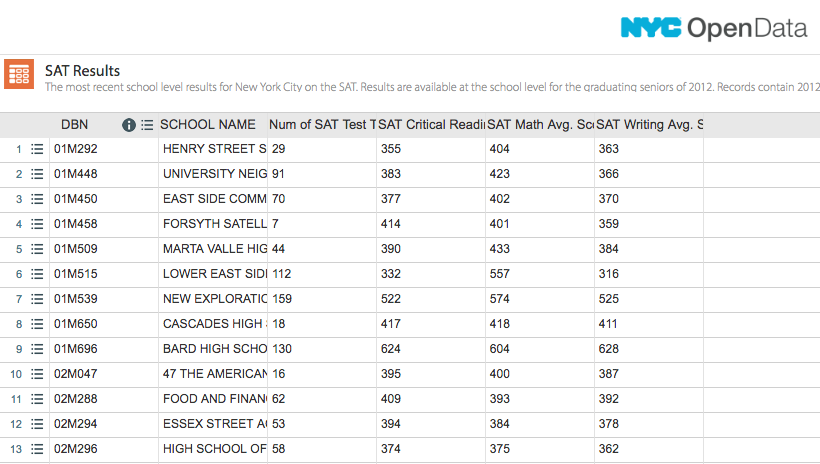

Unfortunately, combining both of the datasets won't give us all of the demographic information we want to use. We'll need to supplement our data with other sources to do our full analysis.

The same website has several related datasets covering demographic information and test scores. Here are the links to all of the datasets we'll be using:

- [SAT scores by school](https://data.cityofnewyork.us/Education/SAT-Results/f9bf-2cp4) - SAT scores for each high school in New York City
- [School attendance](https://data.cityofnewyork.us/Education/School-Attendance-and-Enrollment-Statistics-by-Dis/7z8d-msnt) - Attendance information for each school in New York City
- [Class size](https://data.cityofnewyork.us/Education/2010-2011-Class-Size-School-level-detail/urz7-pzb3) - Information on class size for each school
- [AP test results](https://data.cityofnewyork.us/Education/AP-College-Board-2010-School-Level-Results/itfs-ms3e) - Advanced Placement (AP) exam results for each high school (passing an optional AP exam in a particular subject can earn a student college credit in that subject)
- [Graduation outcomes](https://data.cityofnewyork.us/Education/Graduation-Outcomes-Classes-Of-2005-2010-School-Le/vh2h-md7a) - The percentage of students who graduated, and other outcome information
- [Demographics](https://data.cityofnewyork.us/Education/School-Demographics-and-Accountability-Snapshot-20/ihfw-zy9j) - Demographic information for each school
- [School survey](https://data.cityofnewyork.us/Education/NYC-School-Survey-2011/mnz3-dyi8) - Surveys of parents, teachers, and students at each school

All of these datasets are interrelated. We'll need to combine them into a single dataset before we can find correlations.

## Finding Background Information

Before we move into coding, we'll need to do some background research. A thorough understanding of the data helps us avoid costly mistakes, such as thinking that a column represents something other than what it does. Background research gives us a better understanding of how to combine and analyze the data.

In this case, we'll want to research:

- [New York City](https://en.wikipedia.org/wiki/New_York_City)
- [The SAT](https://en.wikipedia.org/wiki/SAT)
- [Schools in New York City](https://en.wikipedia.org/wiki/List_of_high_schools_in_New_York_City)
- [Our data](https://data.cityofnewyork.us/browse?category=Education)

We can learn a few different things from these resources. For example:

- Only high school students take the SAT, so we'll want to focus on high schools.
- New York City is made up of five boroughs, which are essentially distinct regions.
- New York City schools fall within several different school districts, each of which can contain dozens of schools.
- Our datasets include several different types of schools. We'll need to clean them so that we can focus on high schools only.
- Each school in New York City has a unique code called a DBN or district borough number.
- Aggregating data by district allows us to use the district mapping data to plot district-by-district differences.

## Reading in the Data

Once we've done our background research, we're ready to read in the data. For your convenience, we've placed all the data into the schools folder. Here are all of the files in the folder:

- ap_2010.csv - Data on [AP test results](https://data.cityofnewyork.us/Education/AP-College-Board-2010-School-Level-Results/itfs-ms3e)
- class_size.csv - Data on [class size](https://data.cityofnewyork.us/Education/2010-2011-Class-Size-School-level-detail/urz7-pzb3)
- demographics.csv - Data on [demographics](https://data.cityofnewyork.us/Education/School-Demographics-and-Accountability-Snapshot-20/ihfw-zy9j)
- graduation.csv - Data on [graduation outcomes](https://data.cityofnewyork.us/Education/Graduation-Outcomes-Classes-Of-2005-2010-School-Le/vh2h-md7a)
- hs_directory.csv - A directory of [high schools](https://data.cityofnewyork.us/Education/DOE-High-School-Directory-2014-2015/n3p6-zve2)
- sat_results.csv - Data on [SAT scores](https://data.cityofnewyork.us/Education/SAT-Results/f9bf-2cp4)
- survey_all.txt - Data on [surveys](https://data.cityofnewyork.us/Education/NYC-School-Survey-2011/mnz3-dyi8) from all schools
- survey_d75.txt - Data on [surveys](https://data.cityofnewyork.us/Education/NYC-School-Survey-2011/mnz3-dyi8) from New York City [district 75](https://www.schools.nyc.gov/learning/special-education/school-settings/district-75)

survey_all.txt and survey_d75.txt are in more complicated formats than the other files. For now, we'll focus on reading in the CSV files only, and then explore them.

We'll read each file into a [pandas dataframe](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html) and then store all of the dataframes in a dictionary. This gives us a convenient way to store them and a quick way to reference them later on.

In [1]:
import pandas as pd

data_files = [
    "ap_2010.csv",
    "class_size.csv",
    "demographics.csv",
    "graduation.csv",
    "hs_directory.csv",
    "sat_results.csv"
]

data = {}

for file in data_files:
    data[file[:-4]] = pd.read_csv(f'../../Datasets/{file}')
    


## Exploring the SAT Data

What we're mainly interested in is the SAT dataset, which corresponds to the dictionary key sat_results. This dataset contains the SAT scores for each high school in New York City. We eventually want to correlate selected information from this dataset with information in the other datasets.

Let's explore sat_results to see what we can discover. Exploring the dataframe helps us understand the structure of the data and make it easier for us to analyze it.

In [5]:
df = data['sat_results'].head()
df

,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,355,404,363
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91,383,423,366
2,01M450,EAST SIDE COMMUNITY SCHOOL,70,377,402,370
3,01M458,FORSYTH SATELLITE ACADEMY,7,414,401,359
4,01M509,MARTA VALLE HIGH SCHOOL,44,390,433,384


## Exploring the Remaining Data

When we printed the first five rows of the SAT data, the output looked like this:

We can make a few observations based on this output:

- The DBN appears to be a unique ID for each school.
- We can tell from the first few rows of names that we only have data about high schools.
- There's only a single row for each high school, so each DBN is unique in the SAT data.
- We may eventually want to combine the three columns that contain SAT scores -- SAT Critical Reading Avg. Score, SAT Math Avg. Score, and SAT Writing Avg. Score -- into a single column to make the scores easier to analyze.

Given these observations, let's explore the other datasets to see if we can gain any insight into how to combine them.

Index(['Num of SAT Test Takers', 'SAT Critical Reading Avg. Score',
       'SAT Math Avg. Score', 'SAT Writing Avg. Score'],
      dtype='object')

In [10]:
pd.melt(df, id_vars=['DBN','SCHOOL NAME'], value_vars=df.columns[2:])

,DBN,SCHOOL NAME,variable,value
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,Num of SAT Test Takers,29
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,Num of SAT Test Takers,91
2,01M450,EAST SIDE COMMUNITY SCHOOL,Num of SAT Test Takers,70
3,01M458,FORSYTH SATELLITE ACADEMY,Num of SAT Test Takers,7
4,01M509,MARTA VALLE HIGH SCHOOL,Num of SAT Test Takers,44
5,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,SAT Critical Reading Avg. Score,355
6,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,SAT Critical Reading Avg. Score,383
7,01M450,EAST SIDE COMMUNITY SCHOOL,SAT Critical Reading Avg. Score,377
8,01M458,FORSYTH SATELLITE ACADEMY,SAT Critical Reading Avg. Score,414
9,01M509,MARTA VALLE HIGH SCHOOL,SAT Critical Reading Avg. Score,390


In [12]:
for key in data:
    print(data[key].head())

      DBN                             SchoolName  AP Test Takers   \
0  01M448           UNIVERSITY NEIGHBORHOOD H.S.             39.0   
1  01M450                 EAST SIDE COMMUNITY HS             19.0   
2  01M515                    LOWER EASTSIDE PREP             24.0   
3  01M539         NEW EXPLORATIONS SCI,TECH,MATH            255.0   
4  02M296  High School of Hospitality Management              NaN   

   Total Exams Taken  Number of Exams with scores 3 4 or 5  
0               49.0                                  10.0  
1               21.0                                   NaN  
2               26.0                                  24.0  
3              377.0                                 191.0  
4                NaN                                   NaN  
   CSD BOROUGH SCHOOL CODE                SCHOOL NAME GRADE  PROGRAM TYPE  \
0    1       M        M015  P.S. 015 Roberto Clemente     0K       GEN ED   
1    1       M        M015  P.S. 015 Roberto Clemente     0K     

## Reading in the Survey Data

In the last step, we saw a group of dataframes that looked like this:

We can make some observations based on the first few rows of each one.

- Each dataset appears to either have a DBN column or the information we need to create one. That means we can use a DBN column to combine the datasets. First we'll pinpoint matching rows from different datasets by looking for identical DBNs, then group all of their columns together in a single dataset.
- Some fields look interesting for mapping -- particularly Location 1, which contains coordinates inside a larger string.
- Some of the datasets appear to contain multiple rows for each school (because the rows have duplicate DBN values). That means we’ll have to do some preprocessing to ensure that each DBN is unique within each dataset. If we don't do this, we'll run into problems when we combine the datasets, because we might be merging two rows in one data set with one row in another dataset.

Before we proceed with the merge, we should make sure we have all of the data we want to unify. We mentioned the survey data earlier (survey_all.txt and survey_d75.txt), but we didn't read those files in because they're in a slightly more complex format.

Each survey text file looks like this:

The files are tab delimited and encoded with Windows-1252 encoding. An encoding defines how a computer stores the contents of a file in binary. The most common encodings are UTF-8 and ASCII. Windows-1252 is rarely used and can cause errors if we read such a file in without specifying the encoding. If you'd like to read more about encodings, [here's](http://kunststube.net/encoding/) a good primer.[

We'll need to specify the encoding and delimiter to the pandas [pandas.read_csv()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) function to ensure it reads the surveys in properly.

After we read in the survey data, we'll want to combine it into a single dataframe. We can do this by calling the [pandas.concat()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html) function:

In [13]:
# z = pd.concat([x,y], axis=0)

The code above combines dataframes x and y by essentially appending y to the end of x. The combined dataframe z has the number of rows in x plus the number of rows in y.

## Now, let's read in the survey data.

In [20]:
all_survey = pd.read_csv('../../Datasets/survey_all.txt', delimiter='\t', encoding='windows-1252')
d75_survey = pd.read_csv('../../Datasets/survey_d75.txt', delimiter='\t', encoding='windows-1252')

survey = pd.concat([all_survey, d75_survey], axis=0)

In [21]:
survey.head()

,dbn,bn,schoolname,d75,studentssurveyed,highschool,schooltype,rr_s,rr_t,rr_p,...,s_q14_2,s_q14_3,s_q14_4,s_q14_5,s_q14_6,s_q14_7,s_q14_8,s_q14_9,s_q14_10,s_q14_11
0,01M015,M015,P.S. 015 Roberto Clemente,0,No,0.0,Elementary School,NaN,88,60,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,01M019,M019,P.S. 019 Asher Levy,0,No,0.0,Elementary School,NaN,100,60,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,01M020,M020,P.S. 020 Anna Silver,0,No,0.0,Elementary School,NaN,88,73,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,01M034,M034,P.S. 034 Franklin D. Roosevelt,0,Yes,0.0,Elementary / Middle School,89.0,73,50,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,01M063,M063,P.S. 063 William McKinley,0,No,0.0,Elementary School,NaN,100,60,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Cleaning Up the Surveys

In the last step, the expected output was:

There are two immediate facts that we can see in the data:

- There are over 2000 columns, nearly all of which we don't need. We'll have to filter the data to remove the unnecessary ones. Working with fewer columns makes it easier to print the dataframe out and find correlations within it.
- The survey data has a dbn column that we'll want to convert to uppercase (DBN). The conversion makes the column name consistent with the other data sets.

First, we'll need to filter the columns to remove the ones we don't need. Luckily, there's a data dictionary at the [original data download location](https://data.cityofnewyork.us/Education/NYC-School-Survey-2011/mnz3-dyi8). The dictionary tells us what each column represents. Based on our knowledge of the problem and the analysis we're trying to do, we can use the data dictionary to determine which columns to use.

Here's a preview of the data dictionary:

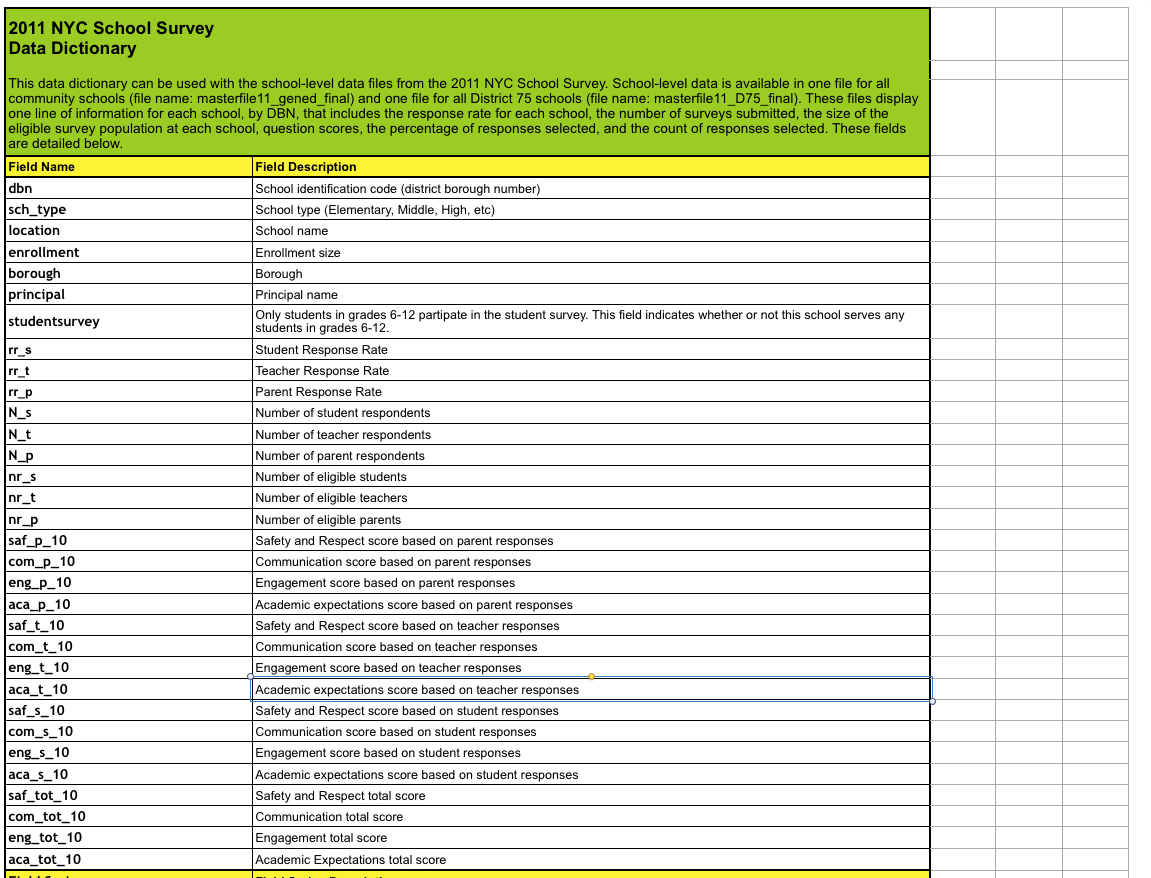

Based on the dictionary, it looks like these are the relevant columns:

In [26]:
cols = ["DBN", "rr_s", "rr_t", "rr_p", "N_s", "N_t", "N_p", "saf_p_11", "com_p_11", "eng_p_11", "aca_p_11", "saf_t_11", "com_t_11", "eng_t_11", "aca_t_11", "saf_s_11", "com_s_11", "eng_s_11", "aca_s_11", "saf_tot_11", "com_tot_11", "eng_tot_11", "aca_tot_11"]

These columns give us aggregate survey data about how parents, teachers, and students feel about school safety, academic performance, and more. It also gives us the DBN, which allows us to uniquely identify the school.

Before we filter columns out, we'll want to copy the data from the dbn column into a new column called DBN. We can copy columns like this:

In [24]:
# survey["new_column"] = survey["old_column"]

Additionally, it's important to use the [.copy()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.copy.html) method when working with pandas DataFrames. This ensures that we are working with a separate copy of the data, so any changes we make don't accidentally affect the original data.

In [28]:
survey = survey.copy()
survey['DBN'] = survey['dbn']


survey = survey[cols]
data['survey'] = survey

##  Inserting DBN Fields

When we explored all of the datasets, we noticed that some of them, like class_size and hs_directory, don't have a DBN column. hs_directory does have a dbn column, though, so we can just rename it.

However, class_size doesn't appear to have the column at all. Here are the first few rows of the data set:

In [50]:
df = data['class_size']
df.head(2)

,CSD,BOROUGH,SCHOOL CODE,SCHOOL NAME,GRADE,PROGRAM TYPE,CORE SUBJECT (MS CORE and 9-12 ONLY),CORE COURSE (MS CORE and 9-12 ONLY),SERVICE CATEGORY(K-9* ONLY),NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,DATA SOURCE,SCHOOLWIDE PUPIL-TEACHER RATIO
0,1,M,M015,P.S. 015 Roberto Clemente,0K,GEN ED,-,-,-,19.0,1.0,19.0,19.0,19.0,ATS,NaN
1,1,M,M015,P.S. 015 Roberto Clemente,0K,CTT,-,-,-,21.0,1.0,21.0,21.0,21.0,ATS,NaN


Here are the first few rows of the sat_results data, which does have a DBN column:

In [47]:
'1'.zfill(2)

'01'

In [51]:
df.CSD.astype(str).apply(lambda x: x.zfill(2)) + df['SCHOOL CODE']

0        01M015
1        01M015
2        01M015
3        01M015
4        01M015
          ...  
27606    32K564
27607    32K564
27608    32K564
27609    32K564
27610    32K564
Length: 27611, dtype: object

In [32]:
data['sat_results'].head()

,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,355,404,363
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91,383,423,366
2,01M450,EAST SIDE COMMUNITY SCHOOL,70,377,402,370
3,01M458,FORSYTH SATELLITE ACADEMY,7,414,401,359
4,01M509,MARTA VALLE HIGH SCHOOL,44,390,433,384


From looking at these rows, we can tell that the DBN in the sat_results data is just a combination of the CSD and SCHOOL CODE columns in the class_size data. The main difference is that the DBN is padded, so that the CSD portion of it always consists of two digits. That means we'll need to add a leading 0 to the CSD if the CSD is less than two digits long. Here's a diagram illustrating what we need to do:

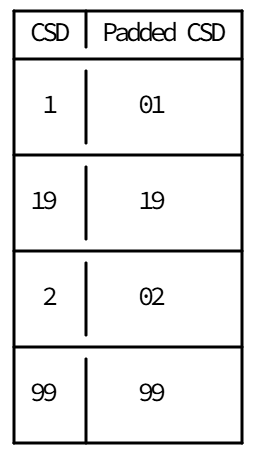

As you can see, whenever the CSD is less than two digits long, we need to add a leading 0. We can accomplish this using the [pandas.Series.apply()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.apply.html) method, along with a custom function that:

- Takes in a number.
- Converts the number to a string using the str() function.
- Check the length of the string using the len() function.

- If the string is two digits long, returns the string.
- If the string is one digit long, adds a 0 to the front of the string, then returns it.

You can use the string method [zfill()](https://docs.python.org/3/library/stdtypes.html#str.zfill) to do this.

Once we've padded the CSD, we can use the addition operator (+) to combine the values in the CSD and SCHOOL CODE columns. Here's an example of how we would do this:

In [33]:
# dataframe["new_column"] = dataframe["column_one"] + dataframe["column_two"]

And here's a diagram illustrating the basic concept:

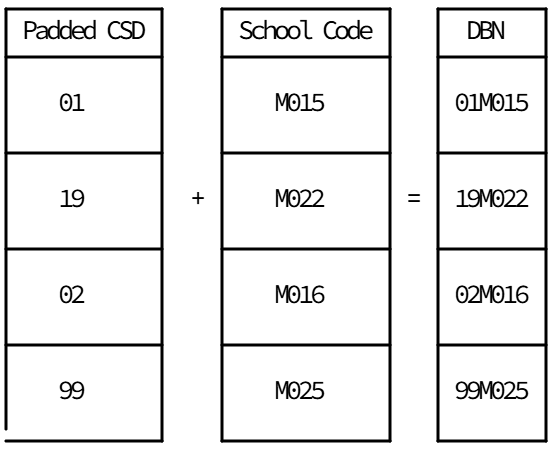

 ## Inserting DBN Fields

Now, let's insert the DBN fields.

In [55]:
data['hs_directory']['DBN'] = data['hs_directory']["dbn"]
data['class_size']['padded_csd'] = data['class_size']['CSD'].astype(str).apply(lambda x: x.zfill(2))
data['class_size']['DBN'] = data['class_size']['padded_csd'] + data['class_size']['SCHOOL CODE']

## Combining the SAT Scores

Now we're almost ready to combine our datasets. Before we do, let's take some time to calculate variables that are useful in our analysis. We've already discussed one such variable -- a column that totals up the SAT scores for the different sections of the exam. This makes it much easier to correlate scores with demographic factors because we'll be working with a single number, rather than three different ones.

Before we can generate this column, we'll need to convert the SAT Math Avg. Score, SAT Critical Reading Avg. Score, and SAT Writing Avg. Score columns in the sat_results dataset from the object (string) data type to a numeric data type. We can use the [pandas.to_numeric()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_numeric.html) method for the conversion. If we don't convert the values, we won't be able to add the columns together.

It's important to pass the keyword argument errors="coerce" when we call pandas.to_numeric(), so that pandas treats any invalid strings it can't convert to numbers as missing values instead.

After we perform the conversion, we can use the addition operator (+) to add all three columns together.

In [66]:
data['sat_results']['SAT Math Avg. Score'] = pd.to_numeric(data['sat_results']['SAT Math Avg. Score'], errors='coerce')
data['sat_results']['SAT Critical Reading Avg. Score'] = pd.to_numeric(data['sat_results']['SAT Critical Reading Avg. Score'], errors='coerce')
data['sat_results']['SAT Writing Avg. Score'] = pd.to_numeric(data['sat_results']['SAT Writing Avg. Score'], errors='coerce')

data['sat_results']['sat_score'] = data['sat_results'][data['sat_results'].columns[3:]].sum(axis=1)
data['sat_results']['sat_score'].head()

0    1122.0
1    1172.0
2    1149.0
3    1174.0
4    1207.0
Name: sat_score, dtype: float64

## Parsing Geographic Coordinates for Schools

Next, we'll want to parse the latitude and longitude coordinates for each school. This enables us to map the schools and uncover any geographic patterns in the data. The coordinates are currently in the text field Location 1 in the hs_directory dataset.

Let's take a look at the first few rows:

As you can see, this field contains a lot of information we don't need. We want to extract the coordinates, which are in parentheses at the end of the field. Here's an example:

In [71]:
data['hs_directory']['Location 1'].iloc[6]

'925 Astor Avenue\nBronx, NY 10469\n(40.859698316, -73.860741404)'

In [128]:

pattern = r'(\(.+\))'
data['hs_directory']['lat'] = data['hs_directory']['Location 1'].str.extract(pattern, expand=False).replace('[()\n]', '', regex=True).str.split(',').str[-1]
data['hs_directory']['lon'] = data['hs_directory']['Location 1'].str.extract(pattern, expand=False).replace('[()\n]', '', regex=True).str.split(',').str[0]

data['hs_directory']['lat'] = pd.to_numeric(data['hs_directory']['lat'], errors='coerce')
data['hs_directory']['lon'] = pd.to_numeric(data['hs_directory']['lon'], errors='coerce')

We're almost ready to combine our datasets! We've come a long way in this lesson -- we've gone from choosing a topic for a project to acquiring the data to having clean data that we're almost ready to combine.

Along the way, we've learned how to:

- Handle files with different formats and columns
- Prepare to merge multiple files
- Use text processing to extract coordinates from a string
- Convert columns from strings to numbers

You'll always learn something new while working on a real-world data science project. Each project is unique and there will always be quirks you don't quite know how to handle. The key is to be willing to try different approaches and to have a general framework in your head for how to move from Step A to Step B.

In the next lesson, we'll finish cleaning the datasets, then combine them so we can start our analysis.